<a href="https://colab.research.google.com/github/joseluiz1990/joseluiz1990/blob/main/ED_Atv05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 05 - Pandas e Matplotlib**

Imagine que sua equipe foi contratada para analisar os dados para uma loja online e recebeu um arquivo .csv contendo informações sobre as vendas dos últimos meses.

Seu objetivo é analisar os dados e gerar gráficos e insights visuais que ajudem a loja a tomar decisões estratégicas.

## **O arquivo para a análise possui as seguintes colunas:**

Produto: Nome do produto vendido

Categoria: Tipo do produto (Eletrônicos, Vestuário, etc.)

Quantidade: Quantidade vendida

Preco_Unitario: Preço unitário do produto

Data_Venda: Data da venda


# 1 - Carregar os dados do arquivo CSV

In [ ]:
import os
import pandas as pd
import csv
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/03_Estrutura de Dados/Atividades/vendas_online.csv'

if os.path.exists(file_path): # se existe o caminho e arquivo, então:
  print("Arquivo existe")
  # ler arquivo e criar Data Frame
  df_original = pd.read_csv(file_path)
else: # senão:
  print("Arquivo NÃO existe")

# copiar df original para df vendas
df_vendas = df_original.copy()

# criar coluna de total de vendas de cada produto
df_vendas['Vendas_Produto'] = df_vendas['Quantidade'] * df_vendas['Preco_Unitario']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo existe


# 2. Calcular os seguintes indicadores:

2.1 - Total de vendas por categoria

Extra - Total de vendas de produto por dia

2.2 - Produto mais vendido e menos vendido em quantidade

2.3 - Receita total gerada pela loja

2.4 - Média de preço dos produtos vendidos

In [ ]:
# Calcular total de vendas por categoria

# criar data frame de categorias
df_categorias = pd.DataFrame(columns=['Categoria', 'Vendas_Categoria'])

# criar Série categoria com a coluna Categoria do data frame
se_categoria = df_vendas.Categoria.unique()

# somar as vendas_produto da mesma categoria
for categoria in se_categoria:
  # criar uma mascara para cada categoria
  msk_categoria = df_vendas['Categoria'] == categoria
  # montar o df categorias com a [categoria e o somatorio das Vendas dos Produtos da mesma Categoria
  # usar .loc para localizar as Vendas_Produtos da Categoria
  # cria o indice do df através do comprimento (len) do df categorias que é incrementado a cada chamado do loop de iteração "for"
  df_categorias.loc[len(df_categorias)] = [categoria, df_vendas.loc[msk_categoria, 'Vendas_Produto'].sum()]


In [ ]:
# Calcular total de vendas de produtos por dia

# alterar data frame Vendas por ordem descrescente de Data de Venda
df_vendas= df_vendas.sort_values(by='Data_Venda', ascending=False)

# criar Série Data com a coluna Data Venda do data frame
se_data = df_vendas.Data_Venda.unique()

# criar data frame de vendas por dia
df_dia_vendas = pd.DataFrame(columns=['Data_Venda', 'Vendas_Dia'])

# somar as vendas_produto do mesmo dia
for data in se_data:
  # criar uma mascara para cada dia
  msk_data = df_vendas['Data_Venda'] == data
  # montar o df dia-vendas com o dia e o somatorio das Vendas dos Produtos do mesmo dia
  # usar .loc para localizar as Vendas_Produtos do dia
  # cria o indice do df através do comprimento (len) do df dia-vendas que é incrementado a cada chamado do loop de iteração "for"
  df_dia_vendas.loc[len(df_dia_vendas)] = [data, df_vendas.loc[msk_data, 'Vendas_Produto'].sum()]


In [ ]:
# Calcular o produto mais vendido e o menos vendido

# localizar o Produto de maior Quantidade
produto_maior_venda = df_vendas.loc[df_vendas['Quantidade'].idxmax(), 'Produto']
# localizar a maior Quantidade
valor_maior_venda = df_vendas.loc[df_vendas['Quantidade'].idxmax(), 'Quantidade']

# localizar o Produto de menor Quantidade
produto_menor_venda = df_vendas.loc[df_vendas['Quantidade'].idxmin(), 'Produto']
# localizar a menor Quantidade
valor_menor_venda = df_vendas.loc[df_vendas['Quantidade'].idxmin(), 'Quantidade']


In [ ]:
# Calcular a receita total gerada pela loja

# calculo somando todos os produtos
receita_total_produtos = df_vendas['Vendas_Produto'].sum()

# calculo somando todas as categorias
receita_total_categorias = df_categorias['Vendas_Categoria'].sum()


In [ ]:
# Calcular a média dos produtos vendidos
media_produtos_vendidos = df_vendas['Vendas_Produto'].mean()

# 3. Exibir os seguintes indicadores:

3.1 - Total de vendas por categoria

3.2 - Produto mais vendido e menos vendido em quantidade

3.3 - Receita total gerada pela loja

3.4 - Média de preço dos produtos vendidos

In [ ]:
print('-' * 65)
print("EXIBIR RESULTADOS")
print('-' * 65)
print("VENDAS POR CATEGORIA")
print('-' * 65)
# imprimir vendas por categoria
print(df_categorias)
print('-' * 65)
print("PRODUTOS MAIS E MENOS VENDIDOS")
print('-' * 65)
# imprimir produto mais vendido
print(f'Produto mais vendido : {produto_maior_venda}  - Quantidade maior venda : {valor_maior_venda}')
# imprimir produto menos vendido
print(f'Produto menos vendido: {produto_menor_venda}  - Quantidade menor venda : {valor_menor_venda}')
print('-' * 65)
print("RECEITA TOTAL DE PRODUTOS")
print('-' * 65)
# imprimir receita total de produtos
print(f"Receita Total de Produtos: {receita_total_produtos:.2f}")
print('-' * 65)
print("MÉDIA DE PRODUTOS VENDIDOS")
print('-' * 65)
# imprimir média dos produtos vendidos
print(f"Média de Produtos Vendidos: {media_produtos_vendidos:.2f}")



-----------------------------------------------------------------
EXIBIR RESULTADOS
-----------------------------------------------------------------
VENDAS POR CATEGORIA
-----------------------------------------------------------------
     Categoria  Vendas_Categoria
0     Livraria         974015.21
1    Alimentos         352220.08
2       Móveis         920984.59
3    Vestuário         576646.69
4  Eletrônicos         546672.69
-----------------------------------------------------------------
PRODUTOS MAIS E MENOS VENDIDOS
-----------------------------------------------------------------
Produto mais vendido : Cadeira  - Quantidade maior venda : 50
Produto menos vendido: Tablet  - Quantidade menor venda : 1
-----------------------------------------------------------------
RECEITA TOTAL DE PRODUTOS
-----------------------------------------------------------------
Receita Total de Produtos: 3370539.26
-----------------------------------------------------------------
MÉDIA DE PRODUTOS 

# 4. Criar gráficos para melhor visualizar os dados:

4.1 - Um gráfico de barras mostrando o total de vendas por categoria

4.2 - Um gráfico de pizza representando a participação de cada categoria no faturamento total

4.3 - Um gráfico de linha mostrando a evolução das vendas ao longo do tempo (com base na coluna Data_Venda)


-----------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: HISTOGRAMA DE VENDAS POR CATEGORIA
-----------------------------------------------------------------


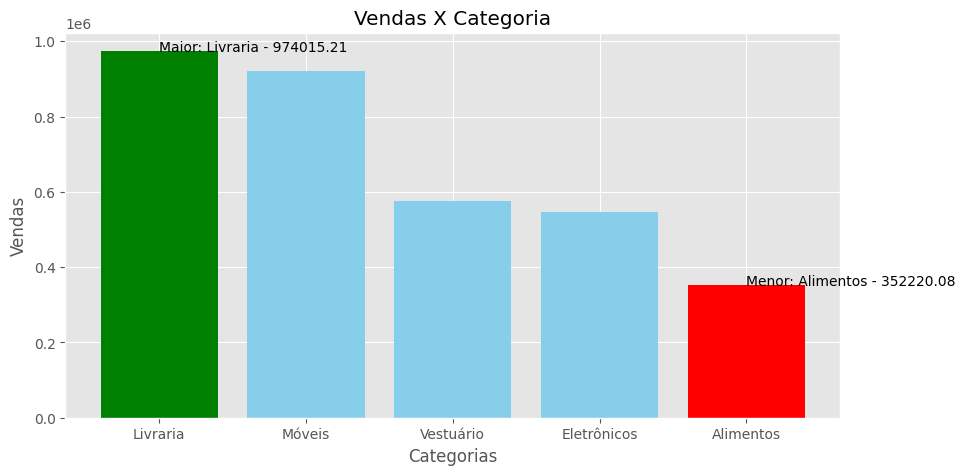

In [ ]:
# Gráfico de barras mostrando o total de vendas por categoria
import matplotlib.pyplot as plt

# alterar data frame Ctaegorias por ordem descrescente de Vendas por Categoria
df_categorias= df_categorias.sort_values(by='Vendas_Categoria', ascending=False)

# "transforma" as colunas do dataframe em séries
categorias = df_categorias['Categoria']
vendas = df_categorias['Vendas_Categoria']

# destacar o maior e menor valor do grafico de barras
max_index = vendas.idxmax()
min_index = vendas.idxmin()

# plotar tamanho do grafico
plt.figure(figsize=(10, 5))

# plotar gráfico de barras
plt.bar(categorias, vendas, color='skyblue')

# plotar anotações de maior e menor
plt.annotate(f'Maior: {categorias[max_index]} - {vendas[max_index]:.2f}', xy=(categorias[max_index], vendas[max_index]))
plt.annotate(f'Menor: {categorias[min_index]} - {vendas[min_index]:.2f}', xy=(categorias[min_index], vendas[min_index]))

# plotar mudança de cor a barra do produto mais vendido e do menos vendido
plt.bar(categorias[max_index], vendas[max_index], color='green')
plt.bar(categorias[min_index], vendas[min_index], color='red')

# plotar legendas do grafico
plt.ylabel('Vendas')
plt.xlabel('Categorias')
plt.title('Vendas X Categoria')

print('-' * 65)
print("VISUALIZAÇÃO DOS DADOS: HISTOGRAMA DE VENDAS POR CATEGORIA")
print('-' * 65)
# plotar grafico
plt.show()

-----------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: PIZZA DE VENDAS POR CATEGORIA
-----------------------------------------------------------------


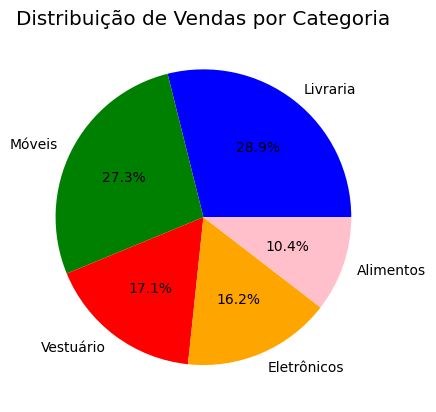

In [ ]:
# Gráfico de pizza representando a participação de cada categoria no faturamento total

import matplotlib.pyplot as plt

# alterar data frame Ctaegorias por ordem descrescente de Vendas por Categoria
df_categorias= df_categorias.sort_values(by='Vendas_Categoria', ascending=False)

# "transforma" as colunas do dataframe em séries
categorias = df_categorias['Categoria']
vendas = df_categorias['Vendas_Categoria']

# plotar grafico de pizza em percentagem
plt.pie(vendas, labels=categorias, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange', 'pink'])

# plotar titulo
plt.title('Distribuição de Vendas por Categoria')

print('-' * 65)
print("VISUALIZAÇÃO DOS DADOS: PIZZA DE VENDAS POR CATEGORIA")
print('-' * 65)
# plotar grafico
plt.show()

-----------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: VENDAS DE PRODUTOS POR DIA
-----------------------------------------------------------------


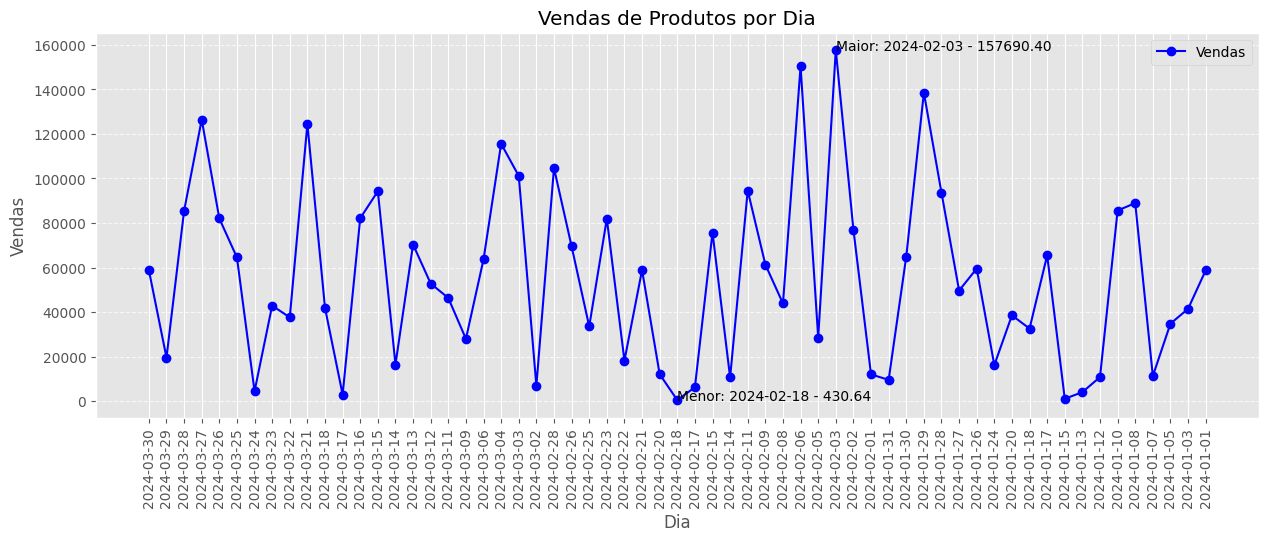

In [ ]:
import matplotlib.pyplot as plt

# alterar data frame Vendas por ordem descrescente de Data de Venda
df_vendas= df_vendas.sort_values(by='Data_Venda', ascending=False)

# "transforma" a serie
vendas = df_dia_vendas['Vendas_Dia']
dia = df_dia_vendas['Data_Venda']

# plotar tamanho do grafico
plt.figure(figsize=(15, 5))

# plotar o grafico de linha
plt.plot(dia, vendas, marker='o', linestyle='-', color='b', label='Vendas')

# destacar o valor da venda de maior valor e o dia
max_index = vendas.argmax()
plt.annotate(f'Maior: {dia[max_index]} - {vendas[max_index]:.2f}', xy=(dia[max_index], vendas[max_index]))

# destacar o valor da venda de menor valor e o dia
min_index = vendas.argmin()
plt.annotate(f'Menor: {dia[min_index]} - {vendas[min_index]:.2f}', xy=(dia[min_index], vendas[min_index]))

# plotar os rótulos
plt.xlabel('Dia')
plt.ylabel('Vendas')
plt.title('Vendas de Produtos por Dia')
plt.legend()
plt.style.use('ggplot') # outros estilos: seaborn, classic, bmh, fivethirtyeight
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plotar os dias
plt.xticks(rotation=90) # rotaciona os rótulos do eixo x em 45 graus
plt.xticks(dia) # usa exatamente o dia sem fazer aproximação

print('-' * 65)
print("VISUALIZAÇÃO DOS DADOS: VENDAS DE PRODUTOS POR DIA")
print('-' * 65)
# plotar o gráfico
plt.show()